In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importation of modules and Processed Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, KFold


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset/thyroid_data.csv")
data

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,0,41,F,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,P
1,1,23,F,f,f,f,f,f,f,f,...,2.0,t,102.0,f,0.99,f,100.0,f,other,P
2,2,46,M,f,f,f,f,f,f,f,...,2.0,t,109.0,t,0.91,t,120.0,f,other,P
3,3,70,F,t,f,f,f,f,f,f,...,1.9,t,175.0,f,0.99,f,100.0,f,other,P
4,4,70,F,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,3767,30,F,f,f,f,f,f,f,f,...,2.0,f,101.0,f,0.99,f,100.0,f,other,P
3768,3768,68,F,f,f,f,f,f,f,f,...,2.1,t,124.0,t,1.08,t,114.0,f,SVI,P
3769,3769,74,F,f,f,f,f,f,f,f,...,1.8,t,112.0,t,1.07,t,105.0,f,other,P
3770,3770,72,M,f,f,f,f,f,f,f,...,2.0,t,82.0,t,0.94,t,87.0,f,SVI,P


## Analysis of dataset and preprocessing for training and testing

In [ ]:
data = data.dropna()
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,0,41,F,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,P
1,1,23,F,f,f,f,f,f,f,f,...,2.0,t,102.0,f,0.99,f,100.0,f,other,P
2,2,46,M,f,f,f,f,f,f,f,...,2.0,t,109.0,t,0.91,t,120.0,f,other,P
3,3,70,F,t,f,f,f,f,f,f,...,1.9,t,175.0,f,0.99,f,100.0,f,other,P
4,4,70,F,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,P


In [ ]:
#data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3772 non-null   int64  
 1   age                        3772 non-null   int64  
 2   sex                        3772 non-null   object 
 3   on thyroxine               3772 non-null   object 
 4   query on thyroxine         3772 non-null   object 
 5   on antithyroid medication  3772 non-null   object 
 6   sick                       3772 non-null   object 
 7   pregnant                   3772 non-null   object 
 8   thyroid surgery            3772 non-null   object 
 9   I131 treatment             3772 non-null   object 
 10  query hypothyroid          3772 non-null   object 
 11  query hyperthyroid         3772 non-null   object 
 12  lithium                    3772 non-null   object 
 13  goitre                     3772 non-null   objec

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
age,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0


In [ ]:
unique_values = data['sex'].unique()
print("processed values in Column1:", unique_values)

replacements = { 'M': 1,'F': 0 } # Apply the replacements
data['sex'] = data['sex'].replace(replacements)

unique_values = data['sex'].unique()
print("processed values in Column1:", unique_values)

processed values in Column1: ['F' 'M']
processed values in Column1: [0 1]


<ipython-input-9-5d25501191e5>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace(replacements)


In [ ]:
replacements = {
    'on thyroxine': {'t':1,'f':0 },
    'query on thyroxine': { 't':1,'f':0 },
    'on antithyroid medication': { 't':1,'f':0 },
    'sick': { 't':1,'f':0 },
    'pregnant':{ 't':1,'f':0 },
    'thyroid surgery':{ 't':1,'f':0 },
    'I131 treatment':{ 't':1,'f':0 },
    'query hypothyroid':{ 't':1,'f':0 },
    'query hyperthyroid':{ 't':1,'f':0 },
    'lithium':{ 't':1,'f':0 },
    'goitre':{ 't':1,'f':0 },
    'tumor':{ 't':1,'f':0 },
    'hypopituitary':{ 't':1,'f':0 },
    'psych':{ 't':1,'f':0 },
    'TSH measured':{ 't':1,'f':0 },
    'T3 measured':{ 't':1,'f':0 },
    'TT4 measured':{ 't':1,'f':0 },
    'T4U measured':{ 't':1,'f':0 },
    'FTI measured':{ 't':1,'f':0 },
    'TBG measured':{ 't':1,'f':0 },
    'binaryClass':{ 'P':1,'N':0 },
    'referral source':{'SVHC':1,'SVI':2,'other':5,'STMW':3,'SVHD':4}
    } # Apply the replacements across specified columns
data.replace(replacements, inplace=True)

<ipython-input-12-cd7989ca12b7>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(replacements, inplace=True)


In [ ]:
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,0,41,0,0,0,0,0,0,0,0,...,2.5,1,125.0,1,1.14,1,109.0,0,1,1
1,1,23,0,0,0,0,0,0,0,0,...,2.0,1,102.0,0,0.99,0,100.0,0,5,1
2,2,46,1,0,0,0,0,0,0,0,...,2.0,1,109.0,1,0.91,1,120.0,0,5,1
3,3,70,0,1,0,0,0,0,0,0,...,1.9,1,175.0,0,0.99,0,100.0,0,5,1
4,4,70,0,0,0,0,0,0,0,0,...,1.2,1,61.0,1,0.87,1,70.0,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3772 non-null   int64  
 1   age                        3772 non-null   int64  
 2   sex                        3772 non-null   int64  
 3   on thyroxine               3772 non-null   int64  
 4   query on thyroxine         3772 non-null   int64  
 5   on antithyroid medication  3772 non-null   int64  
 6   sick                       3772 non-null   int64  
 7   pregnant                   3772 non-null   int64  
 8   thyroid surgery            3772 non-null   int64  
 9   I131 treatment             3772 non-null   int64  
 10  query hypothyroid          3772 non-null   int64  
 11  query hyperthyroid         3772 non-null   int64  
 12  lithium                    3772 non-null   int64  
 13  goitre                     3772 non-null   int64

In [ ]:
data.drop(columns='Unnamed: 0', inplace=True) # Reset the index
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int64  
 1   sex                        3772 non-null   int64  
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [ ]:
all_duplicates = data[data.duplicated(keep=False)]
print("\nAll duplicate rows in the DataFrame:")
print(all_duplicates)


All duplicate rows in the DataFrame:
      age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
39     64    0             0                   0                          0   
92     26    0             0                   0                          0   
104    57    0             0                   0                          0   
204    26    0             0                   0                          0   
210    64    0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3538   29    1             0                   0                          0   
3638   38    0             0                   0                          0   
3707   51    0             0                   0                          0   
3752   71    0             0                   0                          0   
3763   41    0             0                   0                          0   

      sick  p

In [ ]:
data.drop_duplicates(inplace=True)
all_duplicates = data[data.duplicated(keep=False)]
print("\nAll duplicate rows in the DataFrame:")
print(all_duplicates)


All duplicate rows in the DataFrame:
Empty DataFrame
Columns: [age, sex, on thyroxine, query on thyroxine, on antithyroid medication, sick, pregnant, thyroid surgery, I131 treatment, query hypothyroid, query hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH measured, TSH, T3 measured, T3, TT4 measured, TT4, T4U measured, T4U, FTI measured, FTI, TBG measured, referral source, binaryClass]
Index: []

[0 rows x 29 columns]


In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'TT4', 'TSH', 'T3','T4U','FTI']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [ ]:
y = data["binaryClass"]
X = data.drop('binaryClass', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

## Model 1 (Random Forest Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict1=model1.predict(X_test)


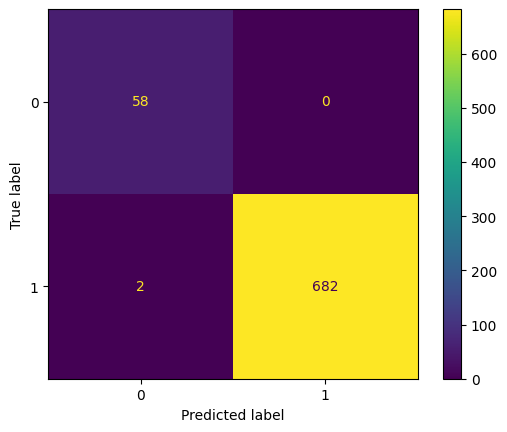

In [ ]:
v=confusion_matrix(y_test,y_predict1)
cm=ConfusionMatrixDisplay(confusion_matrix=v)
cm.plot()

In [ ]:
accuracy = accuracy_score(y_test,y_predict1)
print(f'Accuracy: {accuracy * 100:.2f}%')
precision = precision_score(y_test,y_predict1)
print(f'Precision: {precision * 100:.2f}%')
recall=recall_score(y_test,y_predict1)
print(f'Recall: {recall * 100:.2f}%')
f1 = f1_score(y_test, y_predict1, average='binary')
print(f'F1 Score: {f1*100:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_predict1).ravel()


specificity = tn / (tn + fp)
print(f'Specificity: {specificity*100:.2f}')

fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr*100:.2f}')

fnr = fn / (fn + tp)
print(f'False Negative Rate: {fnr*100:.2f}')

Accuracy: 99.73%
Precision: 100.00%
Recall: 99.71%
F1 Score: 99.85
Specificity: 100.00
False Positive Rate: 0.00
False Negative Rate: 0.29


## Model 2 (SVM)

In [ ]:
from sklearn.svm import SVC

model2 = SVC(C=30 ,kernel= 'rbf')

In [ ]:
model2.fit(X_train,y_train)
y_predict2=model2.predict(X_test)


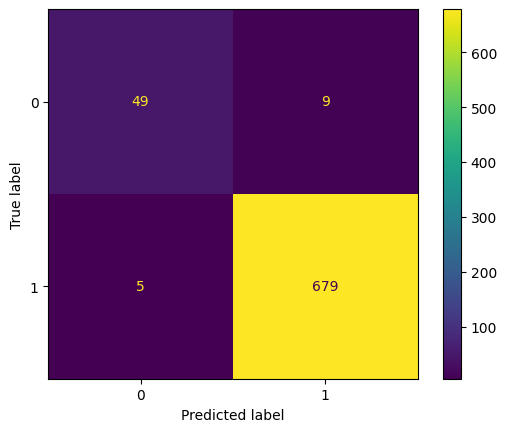

In [ ]:
v=confusion_matrix(y_test,y_predict2)
cm=ConfusionMatrixDisplay(confusion_matrix=v)
cm.plot()

In [ ]:
accuracy = accuracy_score(y_test,y_predict2)
print(f'Accuracy: {accuracy * 100:.2f}%')
precision = precision_score(y_test,y_predict2)
print(f'Precision: {precision * 100:.2f}%')
recall=recall_score(y_test,y_predict2)
print(f'Recall: {recall * 100:.2f}%')
f1 = f1_score(y_test, y_predict2, average='binary')
print(f'F1 Score: {f1*100:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_predict2).ravel()

specificity = tn / (tn + fp)
print(f'Specificity: {specificity*100:.2f}')

fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr*100:.2f}')

fnr = fn / (fn + tp)
print(f'False Negative Rate: {fnr*100:.2f}')

Accuracy: 98.11%
Precision: 98.69%
Recall: 99.27%
F1 Score: 98.98
Specificity: 84.48
False Positive Rate: 15.52
False Negative Rate: 0.73


## Model 3 (Logistic Regression)

In [ ]:
model3=LogisticRegression(C= 20, penalty= 'l1', solver= 'liblinear')
model3.fit(X_train,y_train)
y_predict3=model3.predict(X_test)


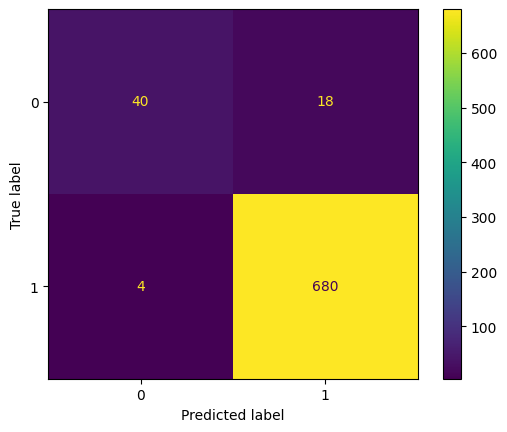

In [ ]:
v=confusion_matrix(y_test,y_predict3)
cm=ConfusionMatrixDisplay(confusion_matrix=v)
cm.plot()

In [ ]:
accuracy = accuracy_score(y_test,y_predict3)
print(f'Accuracy: {accuracy * 100:.2f}%')
precision = precision_score(y_test,y_predict3)
print(f'Precision: {precision * 100:.2f}%')
recall=recall_score(y_test,y_predict3)
print(f'Recall: {recall * 100:.2f}%')
f1 = f1_score(y_test, y_predict3, average='binary')
print(f'F1 Score: {f1*100:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_predict3).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f'Specificity: {specificity*100:.2f}')

# Calculate false positive rate (FPR)
fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr*100:.2f}')

# Calculate false negative rate (FNR)
fnr = fn / (fn + tp)
print(f'False Negative Rate: {fnr*100:.2f}')

Accuracy: 97.04%
Precision: 97.42%
Recall: 99.42%
F1 Score: 98.41
Specificity: 68.97
False Positive Rate: 31.03
False Negative Rate: 0.58


## Model 4 (Decision Tree)

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_predict4 = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_predict4)
print(f'Accuracy: {accuracy * 100:.2f}%')
precision = precision_score(y_test,y_predict4)
print(f'Precision: {precision * 100:.2f}%')
recall=recall_score(y_test,y_predict4)
print(f'Recall: {recall * 100:.2f}%')
f1 = f1_score(y_test, y_predict4, average='binary')
print(f'F1 Score: {f1*100:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_predict4).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f'Specificity: {specificity*100:.2f}')

# Calculate false positive rate (FPR)
fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr*100:.2f}')

# Calculate false negative rate (FNR)
fnr = fn / (fn + tp)
print(f'False Negative Rate: {fnr*100:.2f}')

Accuracy: 99.60%
Precision: 99.85%
Recall: 99.71%
F1 Score: 99.78
Specificity: 98.28
False Positive Rate: 1.72
False Negative Rate: 0.29


## Model 5 (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict5 = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_predict5)
print(f'Accuracy: {accuracy * 100:.2f}%')
precision = precision_score(y_test,y_predict5)
print(f'Precision: {precision * 100:.2f}%')
recall=recall_score(y_test,y_predict5)
print(f'Recall: {recall * 100:.2f}%')
f1 = f1_score(y_test, y_predict5, average='binary')
print(f'F1 Score: {f1*100:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_predict5).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f'Specificity: {specificity*100:.2f}')

# Calculate false positive rate (FPR)
fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr*100:.2f}')

# Calculate false negative rate (FNR)
fnr = fn / (fn + tp)
print(f'False Negative Rate: {fnr*100:.2f}')

Accuracy: 95.28%
Precision: 95.38%
Recall: 99.71%
F1 Score: 97.50
Specificity: 43.10
False Positive Rate: 56.90
False Negative Rate: 0.29


## Visualizing the clustering

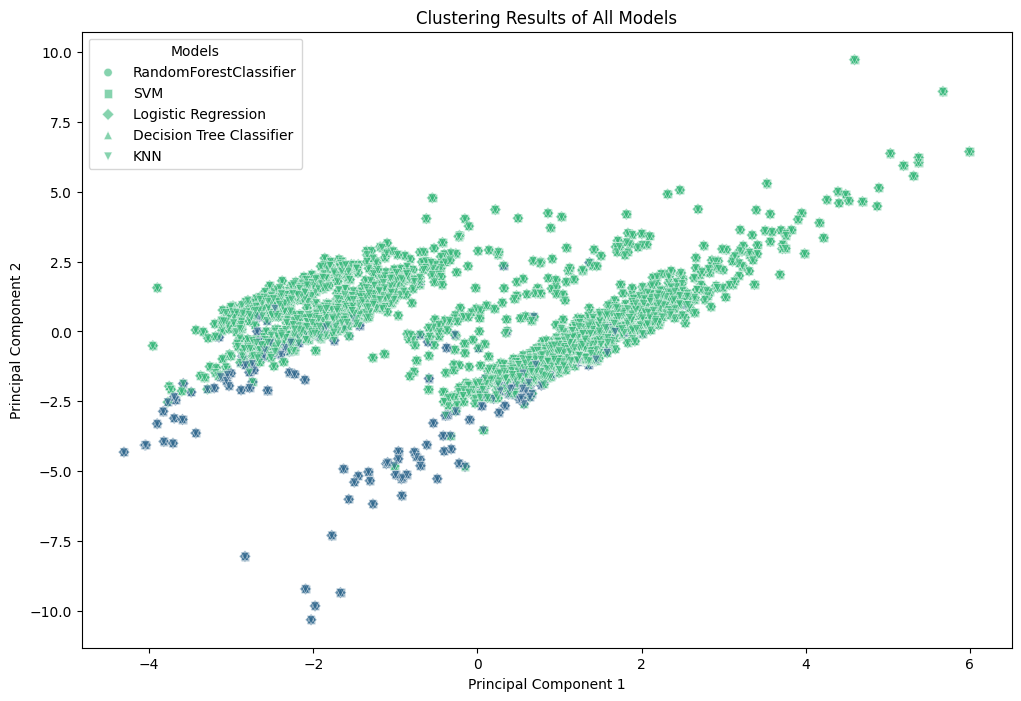

In [ ]:
from sklearn.decomposition import PCA
labels_rfc = model1.predict(X_train)
labels_svm = model2.predict(X_train)
labels_lr = model3.predict(X_train)
labels_dtc = model4.predict(X_train)
labels_knn = model5.predict(X_train)

model_labels = [labels_rfc, labels_svm, labels_lr, labels_dtc, labels_knn]
model_names = ['RandomForestClassifier', 'SVM', 'Logistic Regression',  'Decision Tree Classifier','KNN']

plt.figure(figsize=(12, 8))
pca = PCA(n_components=28)
pca_result = pca.fit_transform(X_train)
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm']
for i, (name, labels, marker, color) in enumerate(zip(model_names, model_labels, markers, colors)):
  sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='viridis', legend=None, alpha=0.6, marker=marker, edgecolor='w', label=name)
plt.title('Clustering Results of All Models')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Models')
plt.show()
